# ADAPTATION OPTIONS APPRAISAL IN SAN SALVADOR

Demographic and economic growth as well as climate change will perturb the risk estimate obtained in [San Salvador Risk](San_Salvador_Risk.ipynb) over the following years. In this section we will consider a plausible future scenario and see how it will affect the region of study. Moreover, we will define household adaptation measures and estimate their cost-benefit relation.

## ENTITY IN 2015

A climada entity contains the socio-economic parameters for a fixed year. These are: exposures, impact functions, adaptation measures and discount rates for the following years. `FL_entity_Acelhuate_houses.xlsx` contains the entity of 2015:

2019-04-03 16:45:17,020 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada_env_comp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2019-04-03 16:45:21,012 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326'}
2019-04-03 16:45:21,013 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-04-03 16:45:21,014 - climada.entity.exposures.base - INFO - centr_ not set.
2019-04-03 16:45:21,015 - climada.entity.exposures.base - INFO - category_id not set.
2019-04-03 16:45:21,016 - climada.entity.exposures.base - INFO - region_id not set.
2019-04-03 16:45:21,017 - climada.entity.exposures.base - INFO - geometry not set.
Total value in 2015: 1.836e+08
2019-04-03 16:45:21,019 - climada.entity.exposures.base - INFO - Setting geometry attribute.
2019-04-03 16:45:21,177 - climada.entity.exposures.base - INFO - Raster from resolution 9.99999999891088e-05° to 9.99999999891088e-05°.


(<Figure size 288x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x1a189e13c8>])

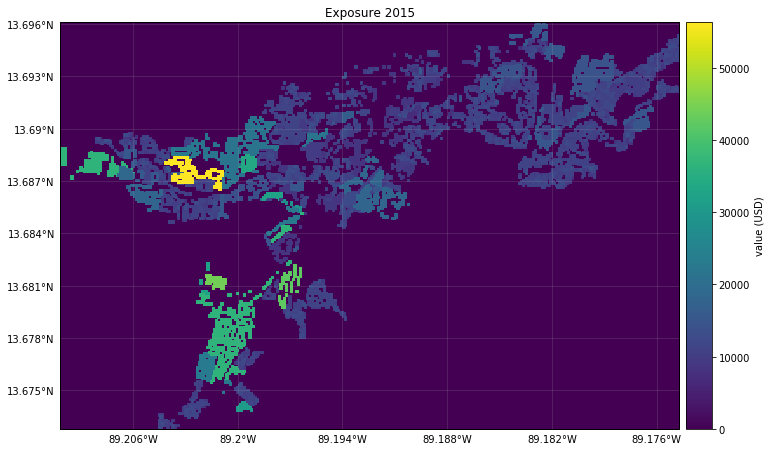

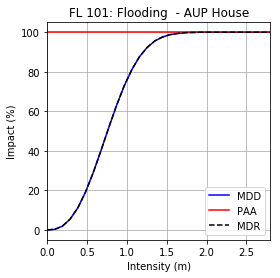

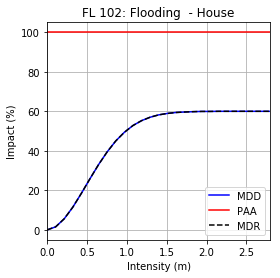

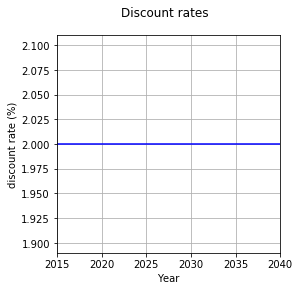

In [1]:
%matplotlib inline
from climada.entity import Entity

ent_2015 = Entity()
ent_2015.read_excel('FL_entity_Acelhuate_houses.xlsx')
ent_2015.exposures.ref_year = 2015 # fix reference year
ent_2015.check()

# Exposures: the ones we used in San Salvador Risk script
print('Total value in 2015: {:.3e}'.format(ent_2015.exposures.value.sum()))
fig, ax = ent_2015.exposures.plot_raster(raster_f=lambda x:x, label='value (USD)')
ax[0, 0].set_title('Exposure 2015')

# Impact Functions: the ones we used in San Salvador Risk script
ent_2015.impact_funcs.get_func('FL', 101).plot()
ent_2015.impact_funcs.get_func('FL', 102).plot()

# Discount rate: 2% yearly discount year until 2040
ent_2015.disc_rates.plot()

# Adaptation measures: we'll look at them later in this script

## ENTITY IN 2040: MODERATE ECONOMIC GROWTH

In 2014 the economic activity had increased 2% in the metropolitan area of San Salvador. The sectors that grew faster were housing and service (4%), insurance and banking (3.4%), communal services (3.2%) and the hotel and restaurant industry (3.2%). We will fix a conservative discount rate of 2% in this analysis. The construction type will remain the same, meaning that the impact functions don't change.

2019-04-03 16:45:25,538 - climada.entity.exposures.base - INFO - centr_ not set.
2019-04-03 16:45:25,539 - climada.entity.exposures.base - INFO - category_id not set.
2019-04-03 16:45:25,540 - climada.entity.exposures.base - INFO - region_id not set.
Total value in 2040: 3.072e+08
2019-04-03 16:45:25,556 - climada.entity.exposures.base - INFO - Raster from resolution 9.99999999891088e-05° to 9.99999999891088e-05°.


Text(0.5,1,'Exposure 2040')

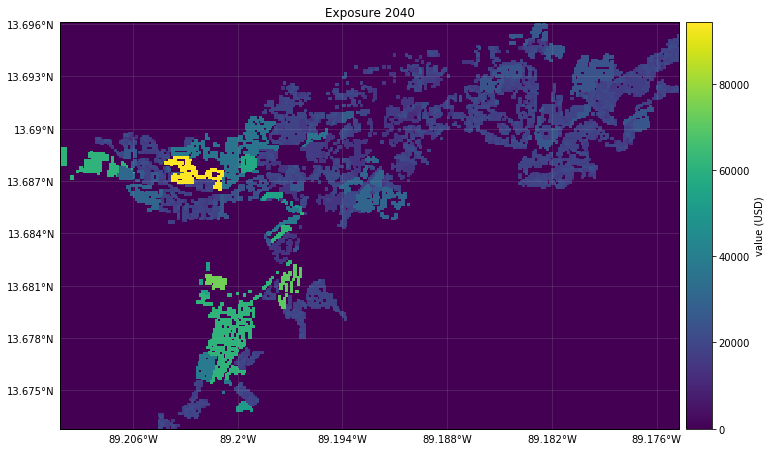

In [2]:
import copy

# same entity as in 2015
ent_2040 = copy.deepcopy(ent_2015)

# Exposures: yearl economic growth of 2% in exposures
ent_2040.exposures.ref_year = 2040
growth = 0.02
ent_2040.exposures['value'] = ent_2040.exposures.value.values*(1 + growth)**(ent_2040.exposures.ref_year - ent_2015.exposures.ref_year + 1)
ent_2040.check() # check values are well set and assignes default values

print('Total value in 2040: {:.3e}'.format(ent_2040.exposures.value.sum()))
fig, ax = ent_2040.exposures.plot_raster(raster_f=lambda x:x, label='value (USD)')
ax[0, 0].set_title('Exposure 2040')

## HAZARD IN 2015

The flood models at 2015 are the same as the ones used in [San Salvador Risk](San_Salvador_Risk.ipynb). These are gathered in climada's Hazard class:

2019-04-03 16:45:29,529 - climada.hazard.centroids.base - INFO - Reading file: Salvador_hazard_FL_2015.mat


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a2807fb38>]],
       dtype=object))

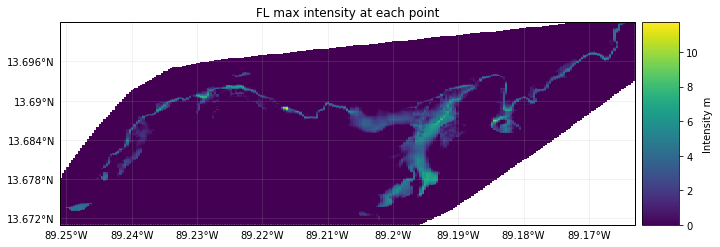

In [3]:
# flood as for 2015
from climada.hazard import Hazard

HAZ_FILE = 'Salvador_hazard_FL_2015.mat'

haz_2015 = Hazard('FL')     # set hazard type
haz_2015.read_mat(HAZ_FILE) # load file
haz_2015.plot_intensity(0)  # maximum intensity reached at each point

## HAZARD IN 2040: EXTREME CLIMATE CHANGE

Future projections of climate change reported by 2015 disturb the frequency of precipitation between -16% and 5%. As a consequence, flood could increae 10% in an extreme climate change scenario as represented in the following model:

2019-04-03 16:45:35,220 - climada.hazard.centroids.base - INFO - Reading file: Salvador_hazard_FL_2040_extreme_cc.mat


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a1a1bcb38>]],
       dtype=object))

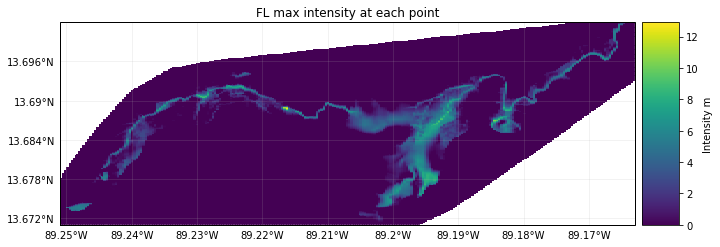

In [4]:
# flood as for 2040 with extreme climate change
from climada.hazard import Hazard

HAZ_FILE = 'Salvador_hazard_FL_2040_extreme_cc.mat'

haz_2040 = Hazard('FL')     # set hazard type
haz_2040.read_mat(HAZ_FILE) # load file
haz_2040.plot_intensity(0)  # maximum intensity reached at each point

## TOTAL EXPECTED FLOOD DAMAGE FROM 2015 UNTIL 2040

The following graph shows the amount of loss that is going to be generated by Acelhuate's floodings in the region of study of San Salvador.

From 2015 until 2040, if the exposure and the hazard remain the same as today, and considering the dicount rates of `ent_2015.disc_rates`, a total amount of 73 millions USD would be damaged.

If we consider the moderate socio-economic growth and extreme climate change described previously, there would be a total loss of 111 millions USD. 22 m USD of these would be caused by the economic growth and 15 m by climate change.

2019-04-03 16:45:40,676 - climada.entity.exposures.base - INFO - Matching 12472 exposures with 153222 centroids.
2019-04-03 16:45:42,577 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:42,586 - climada.entity.exposures.base - INFO - Matching 12472 exposures with 153222 centroids.
2019-04-03 16:45:44,520 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:44,539 - climada.engine.cost_benefit - INFO - Risk function at 2015: 3.563e+06
2019-04-03 16:45:44,539 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:44,541 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:44,552 - climada.engine.cost_benefit - INFO - Risk function at 2040: 7.578e+06


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x107d6a240>)

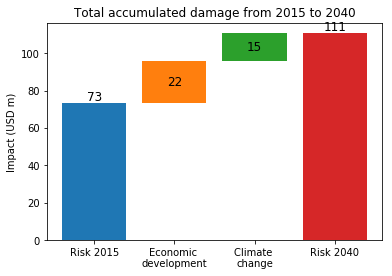

In [5]:
from climada.engine import CostBenefit

cb_acel = CostBenefit()
cb_acel.plot_waterfall(haz_2015, ent_2015, haz_2040, ent_2040)

The accumulated damages are obtained by adding the expected annual damages from 2015 to 2040 (included). In the case of climate change and economic development, the expected annual damage by 2040 has increased with respect to the one of 2015. Assuming that the growth in annual expected damage happens linearly from 2015 to 2040, we obtain a total damage of 111 m USD by 2040. However, if the growth follows a sublinear or superlinear curve, the total amount of loss changes (take into account that the discounting is computed as well).

Importing Jupyter notebook from functions_ss.ipynb


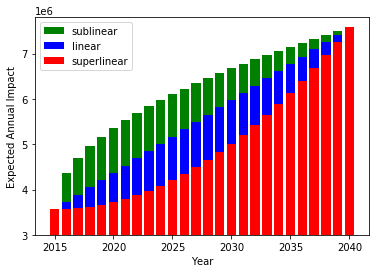

In [6]:
# show difference between sublinear, linear and superlinear expected annual damage growth
import nbimporter
import functions_ss
functions_ss.non_linear_growth(cb_acel)

2019-04-03 16:45:45,043 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:45,046 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:45,057 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:45,058 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:45,076 - climada.engine.cost_benefit - INFO - Risk function at 2015: 3.563e+06
2019-04-03 16:45:45,077 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:45,079 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:45,090 - climada.engine.cost_benefit - INFO - Risk function at 2040: 7.578e+06


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10ce68a20>)

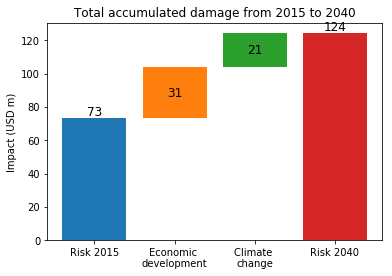

In [7]:
# change growth
growth_fact = 0.5 # < 1: sublinear, >1: superlinear
cb_acel = CostBenefit()
cb_acel.plot_waterfall(haz_2015, ent_2015, haz_2040, ent_2040, imp_time_depen=growth_fact)

## COST AND BENEFIT OF ADAPTATION OPTIONS

Some of the damages could be averted by implementing adaptation measures. We are going to analyse several measures that could be implemented at household level. These tend to be profitable, but of low impact.

The measure `No descargas en Lluvia` defines that every inhabitant of the region avoids discharging the toilet while raining. They should understand that any liquid flowing through the pipes of the houses goes down through the pipes of the city, by ravines and by rivers, sometimes lakes, to the sea. In its path it contaminates and floods, specially during the hours of heavy rain where the streets are inundated. The costs of this measure includes an education program, summing up to 41,894 USD. 

Measure cost 4.189e+04 USD
2019-04-03 16:45:45,195 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:45,197 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.


Text(0.5,1,'Maximumm reduced intensity with measure')

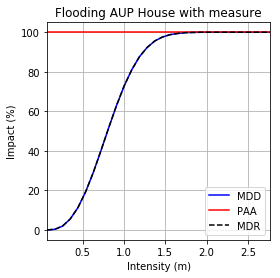

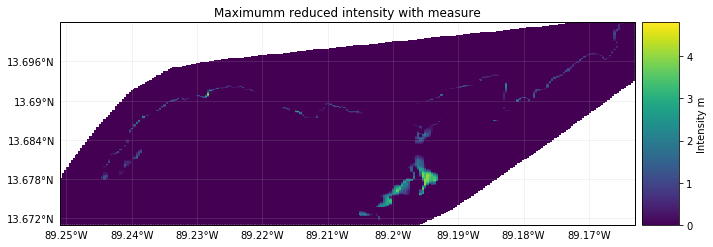

In [8]:
# Measure impact in 2015: No descargas en Lluvia
meas = ent_2015.measures.get_measure('FL', 'No descargas en Lluvia')
print('Measure cost {:.3e} USD'.format(meas.cost))
meas_exp_2015, meas_if_2015, meas_haz_2015 = meas.apply(ent_2015.exposures, ent_2015.impact_funcs, haz_2015)

# exposures stay the same

# impact functions slightly improved:
fig, ax = meas_if_2015.get_func('FL', 101).plot()
ax[0].set_title('Flooding AUP House with measure')

# flood reduced up to 4.8 meters in worst events:
import numpy as np
haz_diff = copy.deepcopy(haz_2015)
haz_diff.intensity = (haz_2015.intensity - meas_haz_2015.intensity)
fig, ax = haz_diff.plot_intensity(0) # maximum intensity difference at each point
ax[0, 0].set_title('Maximumm reduced intensity with measure')

We will estimate the cost-benefit ratio of the following household measures. `Benefit` refers to the total averted damage when the measure is applied from 2015 to 2040, whilst `cost` refers to the implementation and maintance costs of the measure until 2040 (and has therefore been discounted to 2015).

In [9]:
# neame of every considered measure
for meas in ent_2040.measures.get_measure('FL'): # measures related to flood (FL)
    print(meas.name)

Sanitarios de descarga Dual
Ahorradores en Agua en casas
No descargas en Lluvia
Reuso de agua de enjuage
Puentes sin basura
Captacion de agua de techos


2019-04-03 16:45:50,609 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:50,611 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:50,624 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:50,625 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:50,696 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:50,698 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:50,710 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:50,712 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-04-03 16:45:50,780 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-04-03 16:45:50,782 - climad

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x107ae1128>)

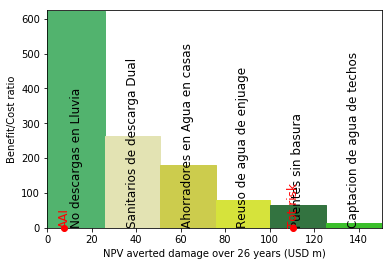

In [10]:
cb_acel = CostBenefit()
cb_acel.calc(haz_2015, ent_2015, haz_2040, ent_2040) # compute
cb_acel.plot_cost_benefit() # plot benefit/cost ratio per measure


All the options avert a similar quantity of damage and result profitable (benefit/cost ratio is greater than 1 in all the cases). However, the most profitable is almost 45 times more cost-effective than the least. That's the `No descargas en Lluvia` measure. 

Whilst the implementation of all the measures could avert the total expected damage, this doesn't mean that they could avert the damages of events with high return period. Following the same color code as in the previous figure, the following figure shows the averted damage per return period of floods. Most of those damages are not averted:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2ef38080>)

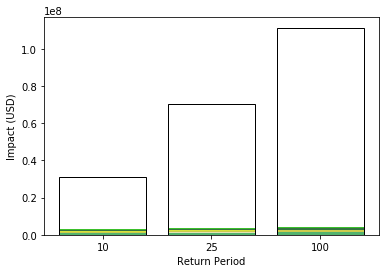

In [11]:
cb_acel.plot_event_view()